# Lesson 3: Exploratory Data Analysis

This lesson showcases the basic elements of exploratory data analysis (EDA) on simple examples.

The major steps of the Data Science lifecycle are:
- Obtain
- Scrub (Clean)
- Explore (EDA)
- Model
- Interpret (Deploy)

In this lesson, we cover partially the first three of them.

## Statistics: basics

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

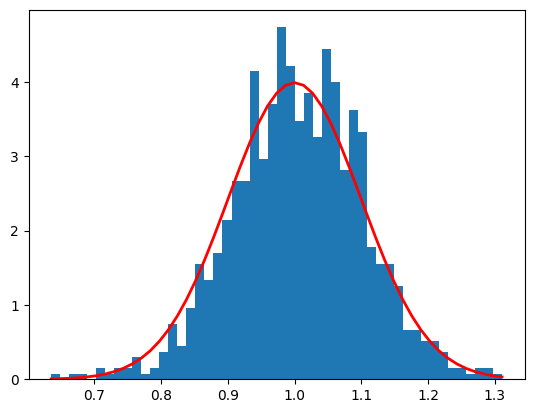

In [2]:
# Random variable, normal distribution
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(s, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

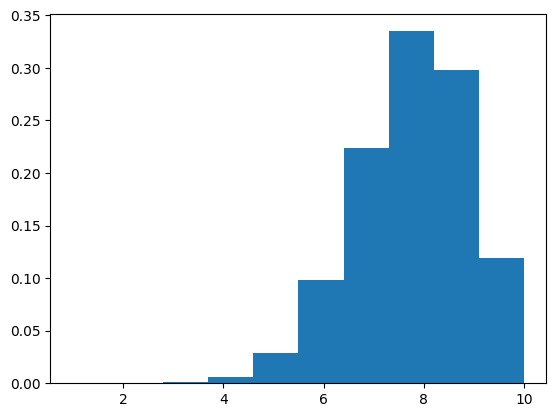

In [3]:
# Random variable, binomial distribution
# x = number of times we throw heads in 10 coin flips
# y = probability to see x heads

n, p = 10, 0.8  # number of flips, probability of each result in a flip
s = np.random.binomial(n, p, 1000000)  # 1000 trials

prob, bins, ignored = plt.hist(s, n, density=True)
plt.show()

In [4]:
prob

array([1.11111111e-05, 8.55555556e-05, 8.83333333e-04, 6.24444444e-03,
       2.91000000e-02, 9.82055556e-02, 2.23990000e-01, 3.34823333e-01,
       2.98388889e-01, 1.19378889e-01])

In [5]:
# expected value
sum([(i*prob[i]) for i in range(n)])

7.777237777777779

In [6]:
np.mean(s)

7.999514

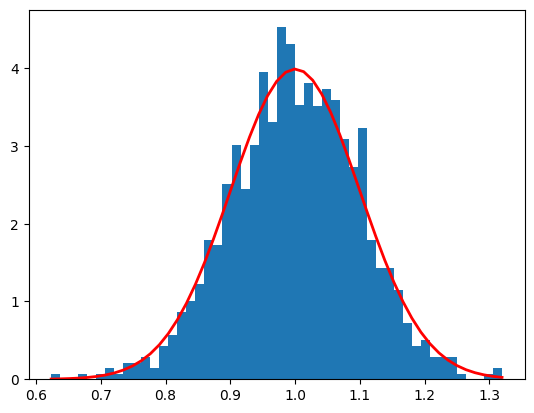

In [7]:
# Random variable, normal distribution (Нормальний розподіл) - in more detail

# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(x, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Probability formula of normal distribution:

![prob-normal](normal-distribution.jpg)

In [8]:
from scipy.stats import norm 

probability_pdf = norm.pdf(0.85, loc=mu, scale=sigma) 
print(probability_pdf)

1.2951759566589167


In [9]:
# average (mean)
x.mean()

1.0000154138127715

In [10]:
# variance
np.sum(((x - x.mean())**2)/len(x))

0.0097137701790965

In [11]:
# standard deviation
np.sqrt(np.sum(((x - x.mean())**2)/len(x)))

0.09855846071797439

In [12]:
# standard deviation
np.std(x)

0.09855846071797439

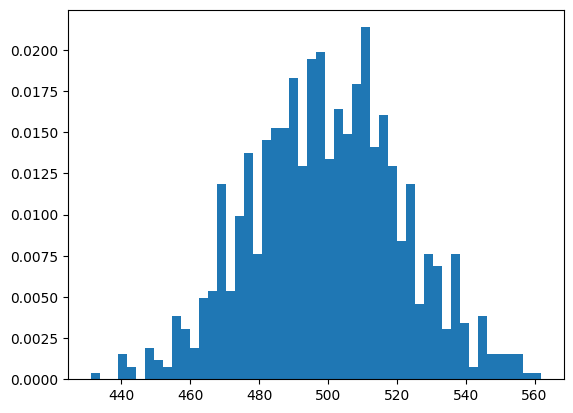

In [13]:
# new variable: z = number of active coupons for discount on meat
# Poisson distribution is a discrete distribution that counts the frequency of occurrences as integers, whose list {0, 1, 2, ...} can be infinite
z = np.random.poisson(500, 1000)
prob, bins, ignored = plt.hist(z, 50, density=True)
plt.show()

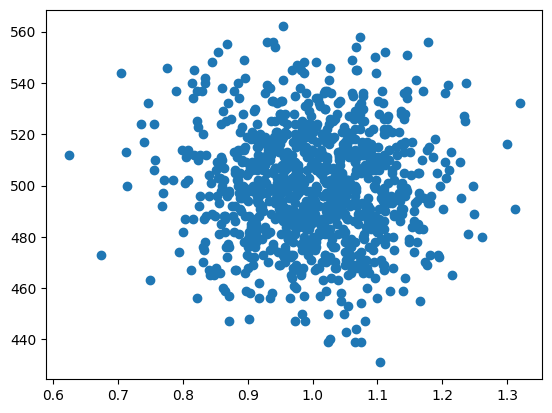

In [14]:
plt.scatter(x, z)

In [15]:
np.cov(x, z)[0][1]
# Note that element C0_1, which shows the covariance between x and z, is negative.

-0.037851934397650666

In [16]:
np.std(z)

22.02509287154086

In [17]:
np.corrcoef(x, z)[0][1]

-0.01741974954292333

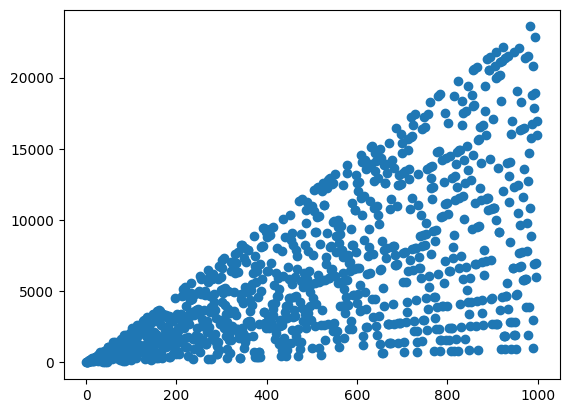

In [18]:
u = np.arange(0, 1000)
j = np.arange(0, 1000)*np.random.randint(1, 25, size=(1000))
plt.scatter(u, j)

In [19]:
np.cov(u, j)[0][1]

994688.6691691689

In [20]:
np.corrcoef(u, j)[0][1]

0.6434519489627083

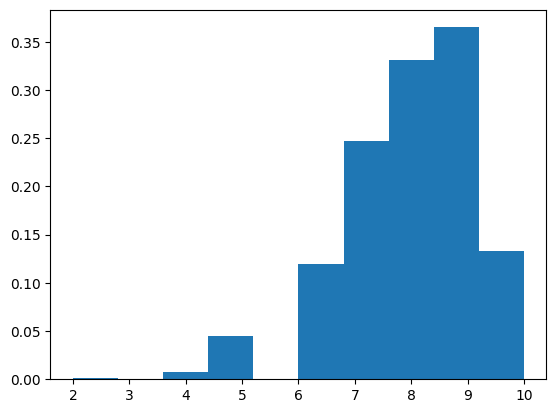

In [21]:
# Central limit theorem

N = 100000000
n = 1000
s = np.random.binomial(10, 0.8, N)
s = s.reshape((N//n, n))

prob, bins, ignored = plt.hist(s[0], 10, density=True)
plt.show()

In [22]:
len(s)

100000

In [23]:
s_means = s.mean(axis=1)
s_means

array([7.976, 7.997, 7.991, ..., 7.984, 7.955, 7.959])

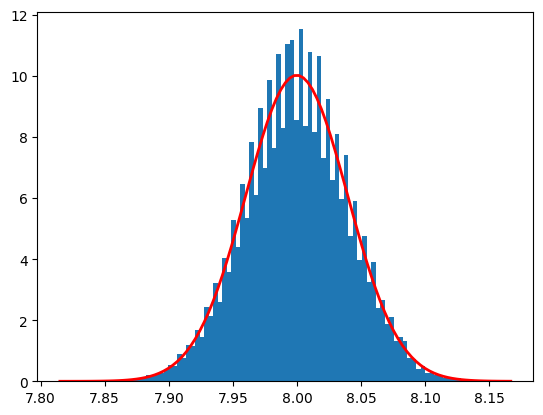

In [24]:
sigma = s_means.std()
mu = s_means.mean()

prob, bins, ignored = plt.hist(s_means, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## Pandas

In [25]:
# intro

In [26]:
import pandas as pd

mountain_height = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4])

print(mountain_height)

0    2061.0
1    2035.8
2    2028.5
3    2022.5
4    2016.4
dtype: float64


In [27]:
type(mountain_height)

pandas.core.series.Series

In [28]:
mountains_height = pd.Series(
    data=[2061, 2035.8, 2028.5, 2022.5, 2016.4],
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"],
    name="Height, m",
    dtype=float,
)

print(mountains_height)

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros            2022.5
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64


In [29]:
print(mountains_height[0])  # 2061.0
print(mountains_height["Goverla"])  # 2061.0

2061.0
2061.0


/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_4392/3549772399.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(mountains_height[0])  # 2061.0


In [30]:
print(mountains_height[["Pip_Ivan", "Goverla", "Gutin_Tomnatik"]])

Pip_Ivan          2028.5
Goverla           2061.0
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64


In [31]:
mountains_height = pd.Series(
    data=[2061, 2035.8, 2028.5, 2022.5, 2016.4],
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"],
    name="Height, m",
    dtype=float,
)

print(mountains_height[1:3])
print(mountains_height["Brebenskyl":"Petros"])

Brebenskyl    2035.8
Pip_Ivan      2028.5
Name: Height, m, dtype: float64
Brebenskyl    2035.8
Pip_Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64


In [32]:
print(mountains_height.Petros)  # 2022.5
print(mountains_height.Brebenskyl)  # 2035.8

2022.5
2035.8


In [33]:
print(mountains_height > 2030)
print(mountains_height[mountains_height > 2030])

Goverla            True
Brebenskyl         True
Pip_Ivan          False
Petros            False
Gutin_Tomnatik    False
Name: Height, m, dtype: bool
Goverla       2061.0
Brebenskyl    2035.8
Name: Height, m, dtype: float64


In [34]:
print("Goverla" in mountains_height)  # True

True


In [35]:
sort_index = mountains_height.sort_index()
print(sort_index)

Brebenskyl        2035.8
Goverla           2061.0
Gutin_Tomnatik    2016.4
Petros            2022.5
Pip_Ivan          2028.5
Name: Height, m, dtype: float64


In [36]:
mountains_height.sort_values(inplace=True, ascending=True)
mountains_height

Gutin_Tomnatik    2016.4
Petros            2022.5
Pip_Ivan          2028.5
Brebenskyl        2035.8
Goverla           2061.0
Name: Height, m, dtype: float64

In [37]:
mountains_height = pd.Series(
    {"Goverla": 2061, "Brebenskyl": 2035.8, "Pip_Ivan": 2028.5},
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"],
    name="Height, m",
    dtype=float,
)

print(mountains_height)
print("")

mountains_height.fillna(0, inplace=True)

print(mountains_height)

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros               NaN
Gutin_Tomnatik       NaN
Name: Height, m, dtype: float64

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros               0.0
Gutin_Tomnatik       0.0
Name: Height, m, dtype: float64


In [38]:
mountains_height_2 = mountains_height.fillna(0, inplace=False)

In [39]:
mountains_height

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros               0.0
Gutin_Tomnatik       0.0
Name: Height, m, dtype: float64

In [40]:
mountains_height = mountains_height.reset_index(drop=False)

In [41]:
mountains_height.columns = ["mountain", "Height, m"]
mountains_height

,mountain,"Height, m"
0,Goverla,2061.0
1,Brebenskyl,2035.8
2,Pip_Ivan,2028.5
3,Petros,0.0
4,Gutin_Tomnatik,0.0


In [42]:
type(mountains_height)

pandas.core.frame.DataFrame

In [43]:
mountains_height.loc[0, "mountain"]

'Goverla'

In [44]:
mountains_height["Goverla" == mountains_height["mountain"]]

,mountain,"Height, m"
0,Goverla,2061.0


In [45]:
mountains_height.to_csv("mountains_height.csv", index=True)

In [46]:
mountains_height.to_excel('mountains_height.xlsx', sheet_name='Mounts')

### JSON

In [47]:
data = {
  "columns": ["name", "country"],
  "index": [1, 2, 3],
  "data": [
    ["Michael", "Canada"],
    ["John", "USA"],
    ["Liza", "Australia"]
  ]
}

In [48]:
df_d = pd.DataFrame(**data)  # unpack the values with **
df_d

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


In [49]:
import os
PATH = "../../data"
employees = pd.read_json(os.path.join(PATH, "names_countries.json"), orient="split")

print(employees)

      name    country
1  Michael     Canada
2     John        USA
3     Liza  Australia


In [50]:
data = {
    "name": ["Michael", "John", "Liza"],
    "country": ["Canada", "USA", "Australia"]
}

In [51]:
df_j = pd.DataFrame.from_dict(data)
df_j

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


In [52]:
df_j.to_json("employees_2.json")

In [53]:
import json

with open(os.path.join(PATH, "employees.json"), "w") as file:
    json.dump(data, file)


In [54]:
pd.read_json("employees.json", orient=None)

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


In [55]:
new_employee = pd.DataFrame.from_dict({"name": ["John"], "country": ["Denmark"]})
print(new_employee)
#df_j.append(new_employee, ignore_index=True) - DEPRECATED in Pandas 2.0
new_df = pd.concat([df_j, new_employee])

   name  country
0  John  Denmark


In [56]:
new_df

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia
0,John,Denmark


In [57]:
# new_df = 
new_df = new_df.reset_index(drop=True)
new_df

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia
3,John,Denmark


### HTML

In [58]:
tmp = pd.read_html("https://statisticstimes.com/tech/top-computer-languages.php", attrs={"id": "table_id1"})

print(tmp[0].head())

   Jun 2022 Change Programming language    Share  Trends
0         1    NaN               Python  27.61 %  -2.8 %
1         2    NaN                 Java  17.64 %  -0.7 %
2         3    NaN           JavaScript   9.21 %  +0.4 %
3         4    NaN                   C#   7.79 %  +0.8 %
4         5    NaN                C/C++   7.01 %  +0.4 %


In [59]:
len(tmp[0])

28

In [60]:
tmp[0].head(-10)  # prints all values up to the last 10 ones (excluding the last 10 ones)

,Jun 2022,Change,Programming language,Share,Trends
0,1,NaN,Python,27.61 %,-2.8 %
1,2,NaN,Java,17.64 %,-0.7 %
2,3,NaN,JavaScript,9.21 %,+0.4 %
3,4,NaN,C#,7.79 %,+0.8 %
4,5,NaN,C/C++,7.01 %,+0.4 %
5,6,NaN,PHP,5.27 %,-1.0 %
6,7,NaN,R,4.26 %,+0.5 %
7,8,↑↑↑,TypeScript,2.43 %,+0.7 %
8,9,↓,Objective-C,2.21 %,+0.1 %
9,10,↓,Swift,2.17 %,+0.4 %


### CSV

We will use the Kaggle Titanic data to demonstrate these major steps.
- Data: https://www.kaggle.com/competitions/titanic/data
- Examples used to compose this notebook: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions, https://www.kaggle.com/code/abhishekmamidi/titanic-data-preprocessing-and-visualization/notebook

In [61]:
# Import data from Kaggle Titanic Competition
PATH = "../../data/titanic"
train_data = pd.read_csv(os.path.join(PATH, "train.csv"), index_col=0)
test_data = pd.read_csv(os.path.join(PATH, "test.csv"), index_col=0)

train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What we can do in order to clean data:
- Remove duplicates
- Handle the NaN values (remove or impute)
- Transform categoric values into numeric values (e.g. one-hot-encoding, label encoding)
- Normalize data

#### Remove duplicates

In [62]:
# Identify duplicates

len(train_data["Name"].unique()) == len(train_data)

True

In [63]:
len(test_data["Name"].unique()) == len(test_data)

True

In [64]:
# concatenate
df_full = pd.concat([train_data.reset_index(drop=False), test_data.reset_index(drop=False)]).reset_index(drop=True)
len(df_full["Name"].unique()) == len(df_full)

False

In [65]:
len(df_full)

1309

In [66]:
df_full[df_full["Name"].duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [67]:
df_full[df_full["Ticket"].duplicated(keep=False)].sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
262,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,0.0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
905,906,NaN,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.175,E31,S
92,93,0.0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S
540,541,1.0,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S


In [68]:
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
df_without_duplicates = df_full.drop_duplicates(keep="first")
len(df_without_duplicates)

1309

### Handle the NaN values

In [69]:
len(train_data)

891

In [70]:
# Train data
column_names = train_data.columns
print("***Empty value counts***")
for column in column_names:
    nan_values = train_data[column].isnull().sum()
    if nan_values > 0:
        print(f"{column}: {nan_values}")

***Empty value counts***
Age: 177
Cabin: 687
Embarked: 2


In [71]:
train_data[train_data["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [72]:
print(f"Before: {len(train_data[train_data['Age'].isnull()])=}")
mean_age = train_data["Age"].mean()
print(f"{mean_age=}")
train_data["Age"].fillna(value=mean_age, inplace=True)
print(f"After: {len(train_data[train_data['Age'].isnull()])=}")

Before: len(train_data[train_data['Age'].isnull()])=177
mean_age=29.69911764705882
After: len(train_data[train_data['Age'].isnull()])=0


In [73]:
# remove columns with embarked empty
print(f"Before: {len(train_data)}")
train_data.dropna(subset=['Embarked'], inplace=True)
train_data[train_data["Embarked"].isnull()]
print(f"After: {len(train_data)}")

Before: 891
After: 889


In [74]:
# drop the whole column
train_data = train_data.drop(["Cabin"], axis=1)

In [75]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Explore

In [76]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


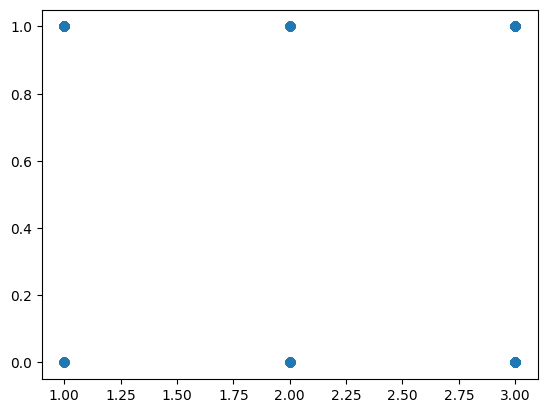

In [78]:
train_data_pclass = train_data['Pclass'].to_numpy()
train_data_survived = train_data['Survived'].to_numpy()

plt.scatter(train_data_pclass, train_data_survived)

In [79]:
print(f"Covariance: {np.cov(train_data_pclass, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_pclass, train_data_survived)[0][1]}")

Covariance: -0.13619285764955077
Correlation: -0.3355488593568269


In [80]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


In [81]:
train_data_sex = train_data['Sex'].to_numpy()
train_data_sex_factorized = pd.factorize(train_data_sex)[0]  # male = 0, female = 1
train_data_sex_factorized

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [82]:
print(f"Covariance: {np.cov(train_data_sex_factorized, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_sex_factorized, train_data_survived)[0][1]}")

Covariance: 0.12576004013011857
Correlation: 0.5415849155511674


In [83]:
train_data_age = train_data['Age'].to_numpy()

print(f"Covariance: {np.cov(train_data_age, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_age, train_data_survived)[0][1]}")

Covariance: -0.47088699142138246
Correlation: -0.0746729237898188


### Time Series

In [84]:
date = pd.Timestamp("2021-09-10")

print(date)  # 2021-09-10 00:00:00

2021-09-10 00:00:00


In [85]:
date = pd.to_datetime("2021-09-10 2:54:13")

print(date)

2021-09-10 02:54:13


In [86]:
type(date)

pandas._libs.tslibs.timestamps.Timestamp

In [87]:
date = pd.date_range(start='2021-09-01', freq='D', periods=8)

temperature = pd.Series([23, 17, 17, 16, 15, 14, 17, 20], index=date)

print(temperature)

2021-09-01    23
2021-09-02    17
2021-09-03    17
2021-09-04    16
2021-09-05    15
2021-09-06    14
2021-09-07    17
2021-09-08    20
Freq: D, dtype: int64


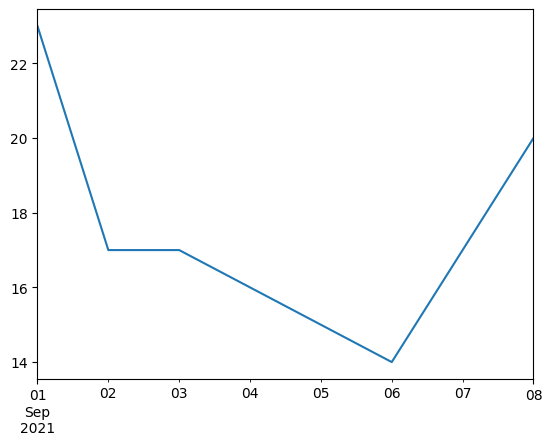

In [88]:
date = pd.date_range(start='2021-09-01', freq='D', periods=8)

temperature = pd.Series([23, 17, 17, 16, 15, 14, 17, 20], index=date)

temperature.plot()
plt.show()